In [1]:
data=read.table("AvTempAtlanta.txt",header=T)
head(data)
names(data)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5,61.8
1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1,62.3
1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6,62.4
1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4,62.3
1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0,62.0
1884,35.9,51.7,54.4,58.4,70.7,71.1,77.7,75.3,74.9,68.1,51.3,44.5,61.2


[1] "Year"   "Jan"    "Feb"    "Mar"    "Apr"    "May"    "Jun"    "Jul"   
 [9] "Aug"    "Sep"    "Oct"    "Nov"    "Dec"    "Annual"

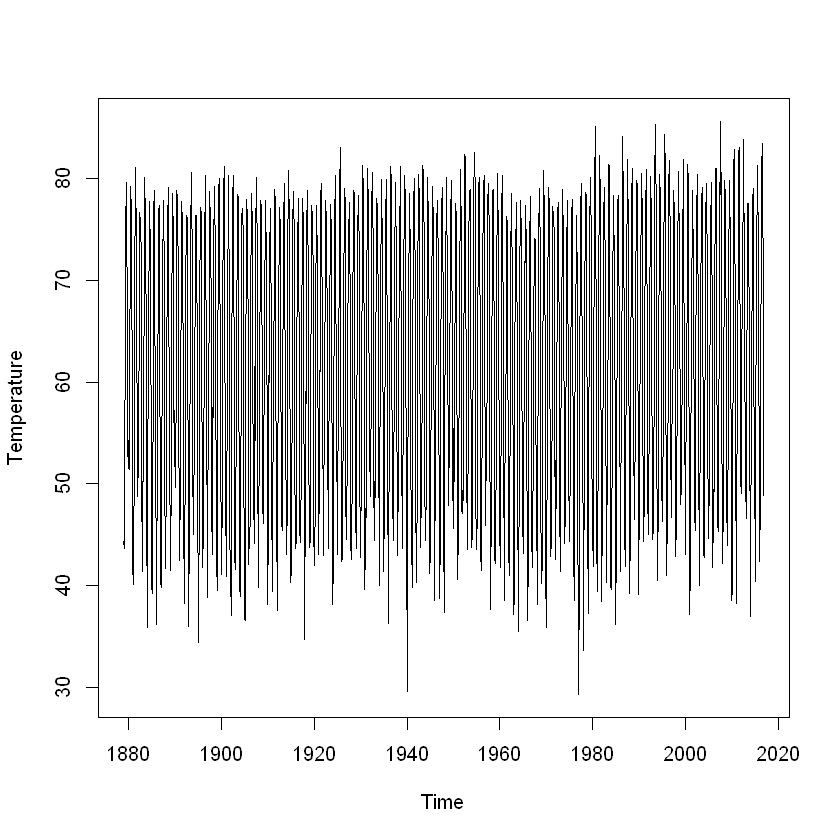

In [2]:
temp=as.vector(t(data[,-c(1,14)]))
temp=ts(temp,start = 1879,frequency = 12)
#?ts #time series objects
ts.plot(temp,ylab="Temperature")

# pre-define time points

In [3]:
##create eaually spaced time points for fitting trends
time.pts=c(1:length(temp))
time.pts=c(time.pts-min(time.pts))/max(time.pts)

# 1. Seasonal Means Model
use `season` function in `TSA` library. To answer is there seasonality and trend in Temperature in Athlanta?

This model is equivalent to ANOVA model where data are categorize into seasonal groups (month here).

In [4]:
library(TSA)

Warning message:
"package 'TSA' was built under R version 3.6.1"
Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



This model omits the January coefficient. Then the Feb coefficient is interpreted as a difference between February and January average temperatures. The March coefficient is interpreted as the difference between March and Feb and so on. or we can fit the model without an intercept (model 2).

In [5]:
# Estimate seasonality
month=season(temp) #12 dummy variable
#Drop January / with intercept
model1=lm(temp~month)
summary(model1)


Call:
lm(formula = temp ~ month)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     43.2072     0.2725 158.534  < 2e-16 ***
monthFebruary    2.7514     0.3854   7.139 1.41e-12 ***
monthMarch      10.0232     0.3854  26.005  < 2e-16 ***
monthApril      18.4014     0.3854  47.742  < 2e-16 ***
monthMay        26.5623     0.3854  68.916  < 2e-16 ***
monthJune       33.4913     0.3854  86.893  < 2e-16 ***
monthJuly       35.7978     0.3854  92.877  < 2e-16 ***
monthAugust     35.0630     0.3854  90.971  < 2e-16 ***
monthSeptember  30.0913     0.3854  78.071  < 2e-16 ***
monthOctober    19.7543     0.3854  51.252  < 2e-16 ***
monthNovember    9.3420     0.3854  24.238  < 2e-16 ***
monthDecember    1.8652     0.3854   4.839 1.43e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.202 on 1644 degrees of f

In [6]:
#seasonal mean effects/without intercept
model2=lm(temp~month-1)
summary(model2)


Call:
lm(formula = temp ~ month - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
monthJanuary    43.2072     0.2725   158.5   <2e-16 ***
monthFebruary   45.9587     0.2725   168.6   <2e-16 ***
monthMarch      53.2304     0.2725   195.3   <2e-16 ***
monthApril      61.6087     0.2725   226.1   <2e-16 ***
monthMay        69.7696     0.2725   256.0   <2e-16 ***
monthJune       76.6986     0.2725   281.4   <2e-16 ***
monthJuly       79.0051     0.2725   289.9   <2e-16 ***
monthAugust     78.2703     0.2725   287.2   <2e-16 ***
monthSeptember  73.2986     0.2725   268.9   <2e-16 ***
monthOctober    62.9616     0.2725   231.0   <2e-16 ***
monthNovember   52.5493     0.2725   192.8   <2e-16 ***
monthDecember   45.0725     0.2725   165.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.202 on 1644 degrees 

# 2. Cos-Sin model
we use `harmonic` function, a matrix consisting of $\cos(2k\pi t)$, $\sin(2k\pi t)$, $k=1,2,...,m$. Adding additional cosine curves (model 4) will sometimes improve the fit. We can evaluate then significance of the model parameters or using a model selection criteria.

In [7]:
har1=harmonic(temp,1)
model3=lm(temp~har1)
har2=harmonic(temp,2)
model4=lm(temp~har2)

In [8]:
summary(model3)


Call:
lm(formula = temp ~ har1)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2003  -2.0059  -0.2022   2.0005  12.4493 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.80254    0.08133  759.870  < 2e-16 ***
har1cos(2*pi*t) -18.30228    0.11502 -159.119  < 2e-16 ***
har1sin(2*pi*t)  -0.69366    0.11502   -6.031 2.01e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.31 on 1653 degrees of freedom
Multiple R-squared:  0.9388,	Adjusted R-squared:  0.9387 
F-statistic: 1.268e+04 on 2 and 1653 DF,  p-value: < 2.2e-16


In [9]:
summary(model4)


Call:
lm(formula = temp ~ har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5699  -2.0031  -0.1105   1.9524  12.5301 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.80254    0.07888  783.490  < 2e-16 ***
har2cos(2*pi*t) -18.30228    0.11155 -164.065  < 2e-16 ***
har2cos(4*pi*t)  -0.63031    0.11155   -5.650 1.88e-08 ***
har2sin(2*pi*t)  -0.69366    0.11155   -6.218 6.36e-10 ***
har2sin(4*pi*t)   0.96246    0.11155    8.628  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.21 on 1651 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9424 
F-statistic:  6766 on 4 and 1651 DF,  p-value: < 2.2e-16


**Comments for 4 models:**

* model 2: seasonal means model without intercept

We can see that Month July and August are the hottest month whereas January is the coldest. We see also the $R^2$ of this model is 99.7% variability explained in this model. That is to say that seasonality explains most of the variability in the monthly average temperature over years.

* model 3 and 4: Cos-Sin Model

In the model4 we added one more set of cons-sin harmonics. The first set of the harmonics are similar in 2 models moreover, the second set of harmonics in model4 have statistically significant coefficients.

Adjusted $R^2$ increases in model4 indicate that perhaps it improves the fit of the seasonality.


# 3. compare models

Here we compare the 2 models (model 2 for seasonal means model and model 4 for cos-sin model). Both are very similar in fitting the seasonality. 

Because the fit is almost the same we would prefer the model with fewer regression coefficients particularly the cos-sin model.

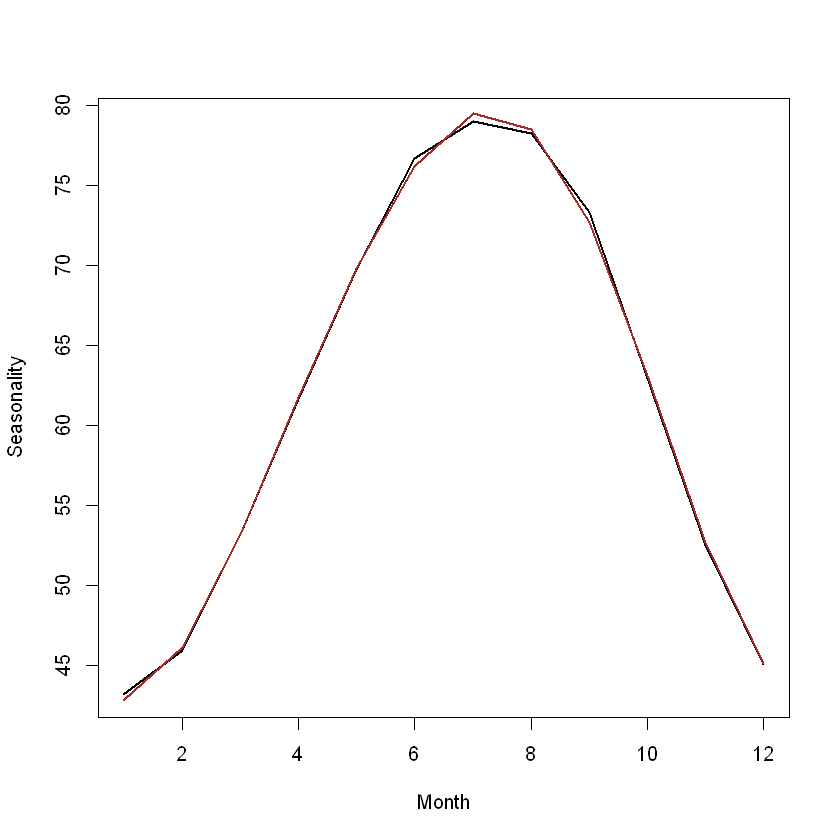

In [10]:
## seasonal means model
st1=coef(model2)
## cos-sin model
st2=fitted(model4)[1:12]
## compare seasonality estimates
plot(1:12,st1,lwd=2,type="l",xlab="Month", ylab="Seasonality")
lines(1:12,st2,lwd=2,col="brown")

# 4. Seasonality & Trend
We consider the simplest parametric model where we consider a quadratic trend and seasonality modeled using the cosine-sine model. Eventually we plot the time series without the trend and seasonality tha is only plot the residual.


Call:
lm(formula = temp ~ x1 + x2 + har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8242  -1.9505  -0.1554   1.9744  12.7916 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.4620     0.2324  264.456  < 2e-16 ***
x1               -1.6526     1.0741   -1.538 0.124119    
x2                3.5021     1.0406    3.365 0.000782 ***
har2cos(2*pi*t) -18.3012     0.1097 -166.844  < 2e-16 ***
har2cos(4*pi*t)  -0.6292     0.1097   -5.736 1.15e-08 ***
har2sin(2*pi*t)  -0.6895     0.1097   -6.286 4.17e-10 ***
har2sin(4*pi*t)   0.9644     0.1097    8.792  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.156 on 1649 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9443 
F-statistic:  4675 on 6 and 1649 DF,  p-value: < 2.2e-16


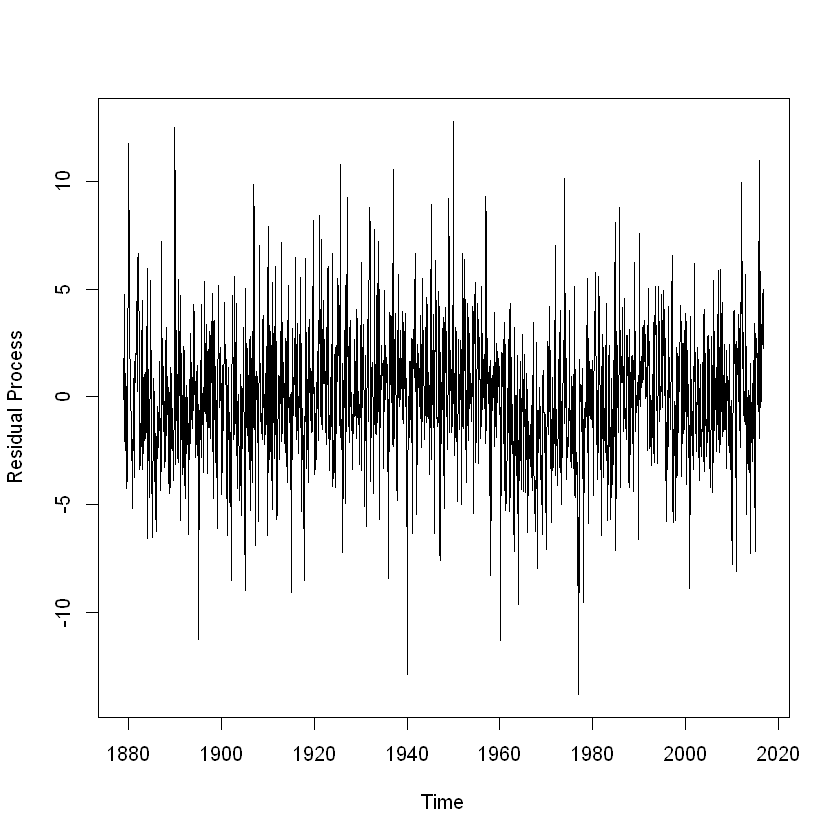

In [11]:
x1=time.pts
x2=time.pts^2
har2=harmonic(temp,2)
lm.fit=lm(temp~x1+x2+har2)
summary(lm.fit)

dif.fit.lm=ts((temp-fitted(lm.fit)),start=1879,frequency=12)
ts.plot(dif.fit.lm,ylab="Residual Process")

we can try also to fit a non-parametric trend along with the seasonality (cos-sin model)

In [12]:
library(mgcv)
# splines trend estimation (gam)
gam.fit=gam(temp~s(time.pts)+har2)
dif.fit.gam=ts((temp-fitted(gam.fit)),start=1879,frequency=12)

Warning message:
"package 'mgcv' was built under R version 3.6.1"Loading required package: nlme
Warning message:
"package 'nlme' was built under R version 3.6.1"This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


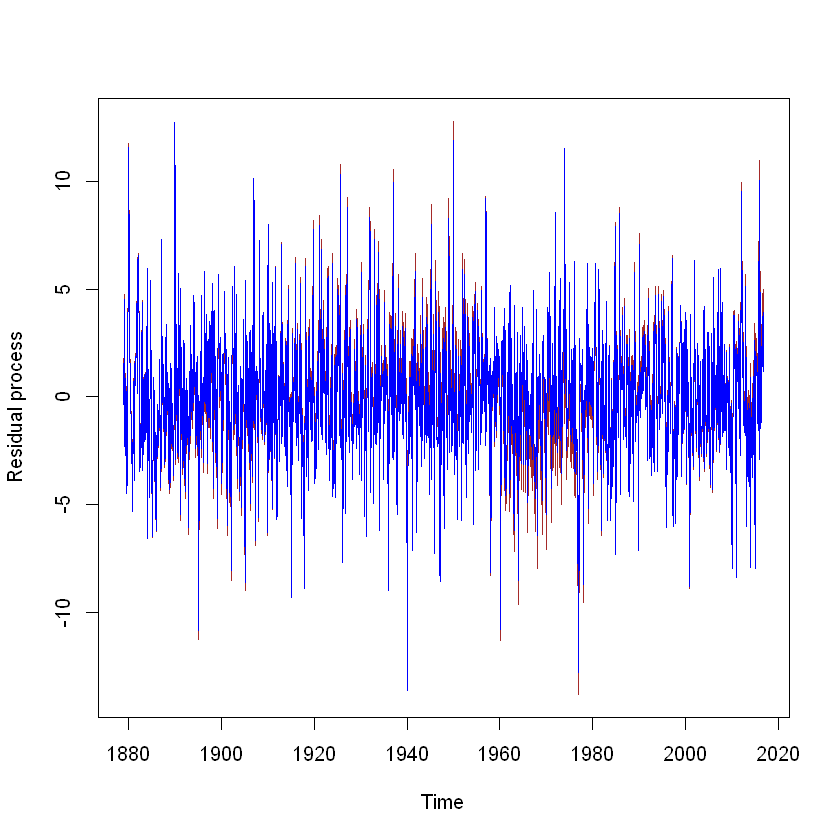

In [13]:
#compare 2
ts.plot(dif.fit.lm,ylab="Residual process", col="brown")
lines(dif.fit.gam,col="blue")

Brown is the process for parametric model and blue is from the non-parametric model. The difference are small in 2 different approaches.

Further we can study the way to evaluate whether such process is stationary (whether the trend and seasonality components have been removed).

# 5. Autocorrelation Functions
with `ACF` functions in R

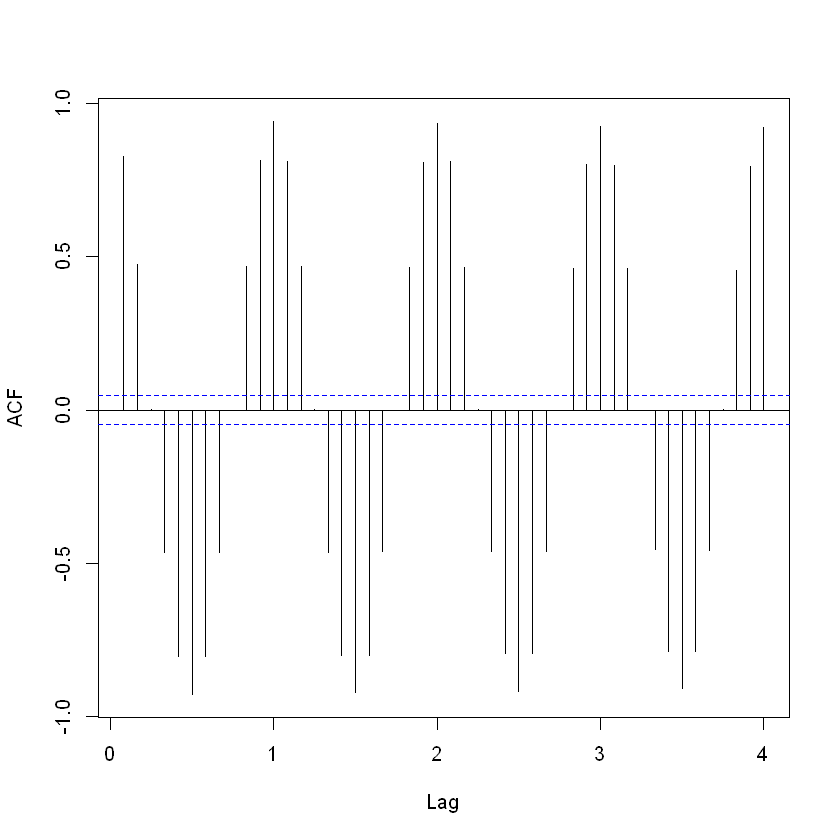

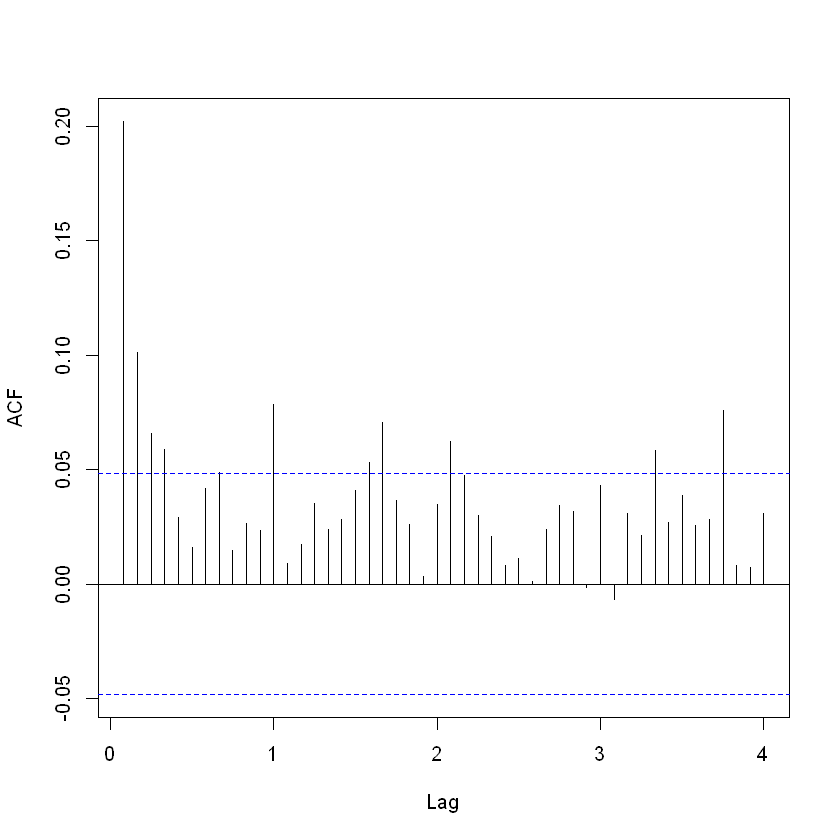

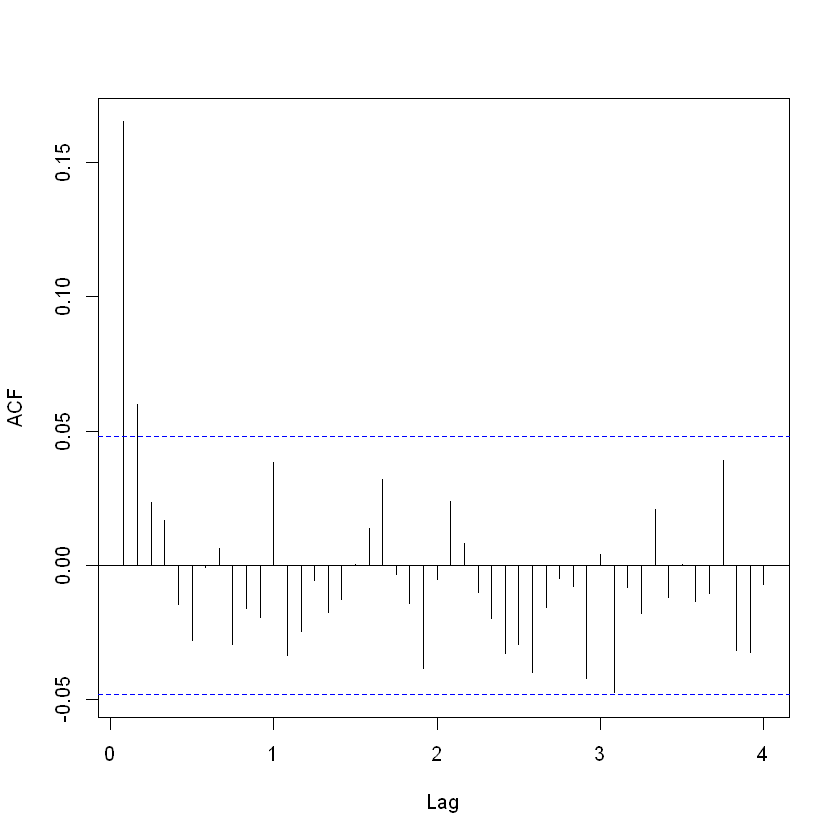

In [14]:
## ACF for the temperature time series
acf(temp,lag.max=12*4,main="")
## ACF for the residual process
acf(dif.fit.lm,lag.max=12*4,main="")
acf(dif.fit.gam,lag.max=12*4,main="")


**Comment:**

The ACF (autocorrelation function) without reducing trend and seasonality (graph 1) shows a clear seasonality pattern. but the trend cannot be seen from this plot since it is slowly changing over the years.

The ACF plot for the residual from the parametric approach (graph 2) we can see that the seasonality is not present anymore. we still observe some cyclical pattern over time. Moreover most of the ACF values are positive showing some bias in the estimation of trend or cyclical pattern.

Last graph is the ACF plot for the residual where the trend is eliminated using non-parametric regression. ACF plot doesn't have a cyclical pattern like the previous residual plot, it shows less bias in the removal of the trend and cyclical pattern.